# Módulo 6 Actvidad 3

## Intención del aprendizaje esperado:

**3. Elaborar un modelo predictivo aplicando técnicas de Agrupamiento Jerárquico utilizando lenguaje Python para resolver un problema de clusterización**

## Ejercicios Planteados


**Para esta sección, siga los pasos para crear la clasificación:**


**1. Para un grupo de datos simulados, use la siguiente función:**


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings("ignore")


In [16]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)


**2. Para la siguiente clasificación construya un dendrograma, con distintas métricas.**

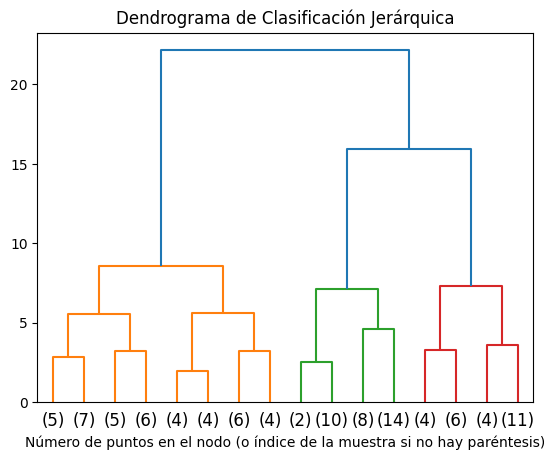

In [33]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Ajustar el modelo de agrupamiento jerárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Graficar el dendrograma
plt.title('Dendrograma de Clasificación Jerárquica')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice de la muestra si no hay paréntesis)")
plt.show()